In [3]:
import pandas as pd
import numpy as np
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn
import math
import seaborn as sns
import os
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa

In [4]:
disease = ["CD","CDI","autism", "RA", "T1D", "CRC", "EDD","HIV", "PAR", "OB", "NASH", "MHE", "ASD"]
disease_map = {"OB": ['ob_goodrich', 'ob_gordon_2008_v2', 'ob_ross', 'ob_zupancic'], "NASH": ['nash_chan', 'nash_ob_baker'], "MHE":['mhe_zhang'], "CD":['ibd_alm','ibd_engstrand_maxee','ibd_gevers_2014','ibd_huttenhower']
               ,"CDI":['cdi_schubert', 'cdi_vincent_v3v5', 'cdi_youngster'],"autism":['autism_kb'], "RA":['ra_littman'],"T1D":['t1d_alkanani','t1d_mejialeon'],"CRC":['crc_baxter', 'crc_xiang', 'crc_zackular', 'crc_zeller', 'crc_zhao'],
               "EDD":['edd_singh'],"HIV":['hiv_dinh', 'hiv_lozupone', 'hiv_noguerajulian'], "PAR": ['par_scheperjans'], "ASD": ['asd_son']}
colors = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'b', 'g']
all_names = [x[:-8] for x in os.listdir("C:/Users/talno/microbiom_project/all_datasets/")]
data_map = dict()
for key, vals in disease_map.items():
    for val in vals:
        data_map[val] = key
color_disease = {"CD": 'b', "CDI": '#ff7f0e', "autism": '#2ca02c', "OB": 'k', 'CRC': 'c', 'HIV': 'm', "EDD":'peru', "T1D": 'orangered', "RA": 'lime', "EDD": 'mistyrose', "PAR": 'skyblue', "NASH": '#d62728', "MHE": 'y', "ASD":'olive'}

READ THE CLEANED DATA

-relative abundance 

-microbiome HD is concatenated

-merged with meta data - healthy vs disease


Genus level

In [5]:
dataHD = pd.read_csv("C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/american_gut/cleaned_microbiomeHD_29_g")
dataAmericans = pd.read_csv("C:/Users/talno/microbiom_project/cleaned_Americans_versionA", low_memory=False)
all_data = pd.read_csv("C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/american_gut/all_data_g", low_memory=False)
dataHD.drop(columns='Unnamed: 0', inplace=True)
dataAmericans.drop(columns='Unnamed: 0', inplace=True)
all_data.drop(columns='Unnamed: 0', inplace=True)

Phylum level

In [28]:
dataHD = pd.read_csv("C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/american_gut/cleaned_microbiomeHD_29_f")
dataAmericans = pd.read_csv("C:/Users/talno/microbiom_project/cleaned_Americans_versionA_f", low_memory=False)
all_data = pd.read_csv("C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/american_gut/all_data_f", low_memory=False)
dataHD.drop(columns='Unnamed: 0', inplace=True)
dataAmericans.drop(columns='Unnamed: 0', inplace=True)
all_data.drop(columns='Unnamed: 0', inplace=True)

NUMBER OF SAMPLES FROM EACH DATASET

NUMBER OF SAMPLES FROM EACH DATASET

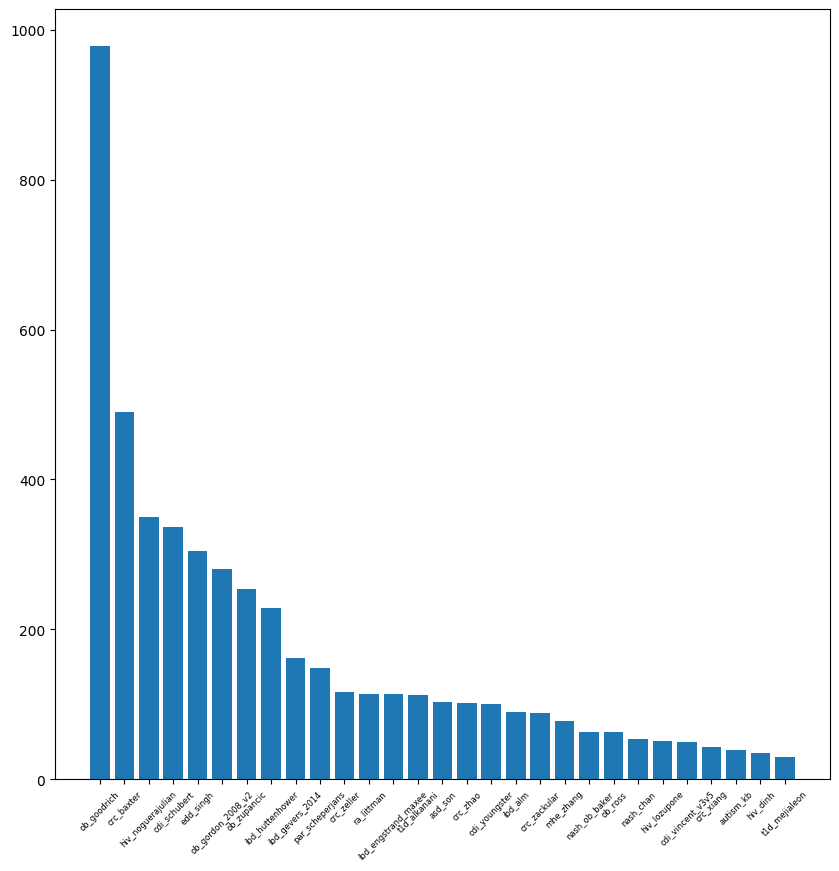

In [29]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(np.arange(0, len(dataHD.From.value_counts())), dataHD.From.value_counts())
plt.xticks(np.arange(0, len(dataHD.From.value_counts())), list(dataHD.From.value_counts().keys()), rotation=45, size=6)
plt.show()

PCA/PCoA

In [6]:
def PC(feature_table, pca=True):
    if not pca:
        distance_table = beta_diversity("braycurtis", feature_table, list(feature_table.index))
        components = pcoa(distance_table)
        pcoa_comp = components.samples.loc[:4974, ['PC1','PC2']]
        print("explained variance: ", components.proportion_explained[:2]*100)
        return pcoa_comp
    else:
        pca = PCA(n_components=2)
        pca.fit(feature_table)
        components = pca.transform(feature_table)
        pca_comp = pd.DataFrame(data= components[:4975], columns= ['PC1', 'PC2'])
        loadings = pca.components_[:2].T
        tops = (loadings ** 2).sum(axis=1).argsort()[-10:]
        loadings = loadings[tops]
        print("explained variance: ", pca.explained_variance_ratio_*100)
        return pca_comp, loadings, tops

In [36]:
# components, loadings, tops = PC(all_data.drop(columns=['From']))
components_pcoa = PC(all_data.drop(columns=['From']), pca=False)

In [31]:
%matplotlib inline
def plot_pca(components, arrow=True, pca=True, loadings=None, tops=None):
    plt.figure(figsize=(10,10))
    polar_data = dict()
    plt.xlabel('PC1 ', fontsize=20)
    plt.ylabel('PC2 ', fontsize=20)
    plt.title("Principal Component Analysis",fontsize=20)
    arrows, var_x, var_y, angles, sizes = dict(), [], [], [], []
    for target, color in zip(all_names,colors):
        arrows[target] = list()
        indicesToKeep = (dataHD['From'] == target) & (dataHD['State'] == 'H')
        x = components.loc[indicesToKeep.values, 'PC1'].values.mean()
        y = components.loc[indicesToKeep.values, 'PC2'].values.mean()
        arrows[target].append(x)
        arrows[target].append(y)
        if not arrow:
            plt.scatter(components.loc[indicesToKeep.values, 'PC1'] , components.loc[indicesToKeep.values, 'PC2'], c='none', edgecolors=color, s=50)
        
        indicesToKeep = (dataHD['From'] == target) & (dataHD['State'] == 'D')
        x = components.loc[indicesToKeep.values, 'PC1'].values.mean()
        y = components.loc[indicesToKeep.values, 'PC2'].values.mean()
        arrows[target].append(x)
        arrows[target].append(y)
        if not arrow:
            plt.scatter(components.loc[indicesToKeep.values, 'PC1'] , components.loc[indicesToKeep.values, 'PC2'], c=color, edgecolors=color, s=50)
    # find centroids and plotting an arrow

    for (name, (x1,y1,x2,y2)), color in zip(arrows.items(), colors):
        if arrow:
            plt.arrow(x1, y1, x2-x1,y2-y1, color=color_disease[data_map[name]], width = 0.005)
            # plt.arrow(x1, y1, x2-x1,y2-y1, color=color, width = 0.005)     
        angles.append(math.atan2(y2-y1, x2-x1))
        sizes.append(math.sqrt((x2-x1)**2+(y2-y1)**2))
    if arrow:
        plt.legend(all_names, bbox_to_anchor=(1., 0., 0.6, 1.)) 
    else:
        plt.legend(np.repeat(all_names, 2), bbox_to_anchor=(0.7, 0., 0.9, 1.)) 
    # return angles, sizes
    if pca:
        for (i, arrow), index in zip(enumerate(loadings[-5:]),tops):
            plt.arrow(0, 0, *arrow, color='k', alpha=0.5, ec='none',
              length_includes_head=True)
            plt.text(*(arrow * 1.0), all_data.columns[index]+'_'+str(5-i),
             ha='center', va='center')
    return angles, sizes

In [216]:
loadings

array([[-0.01676333, -0.04388736],
       [-0.01499995,  0.04851666],
       [-0.0147108 , -0.05351756],
       [ 0.0254251 , -0.0561601 ],
       [-0.01800484, -0.07073529],
       [-0.00443118, -0.10070268],
       [-0.01190469, -0.12371224],
       [-0.0186518 , -0.14592065],
       [-0.09004902,  0.96154081],
       [ 0.99368312,  0.08088593]])

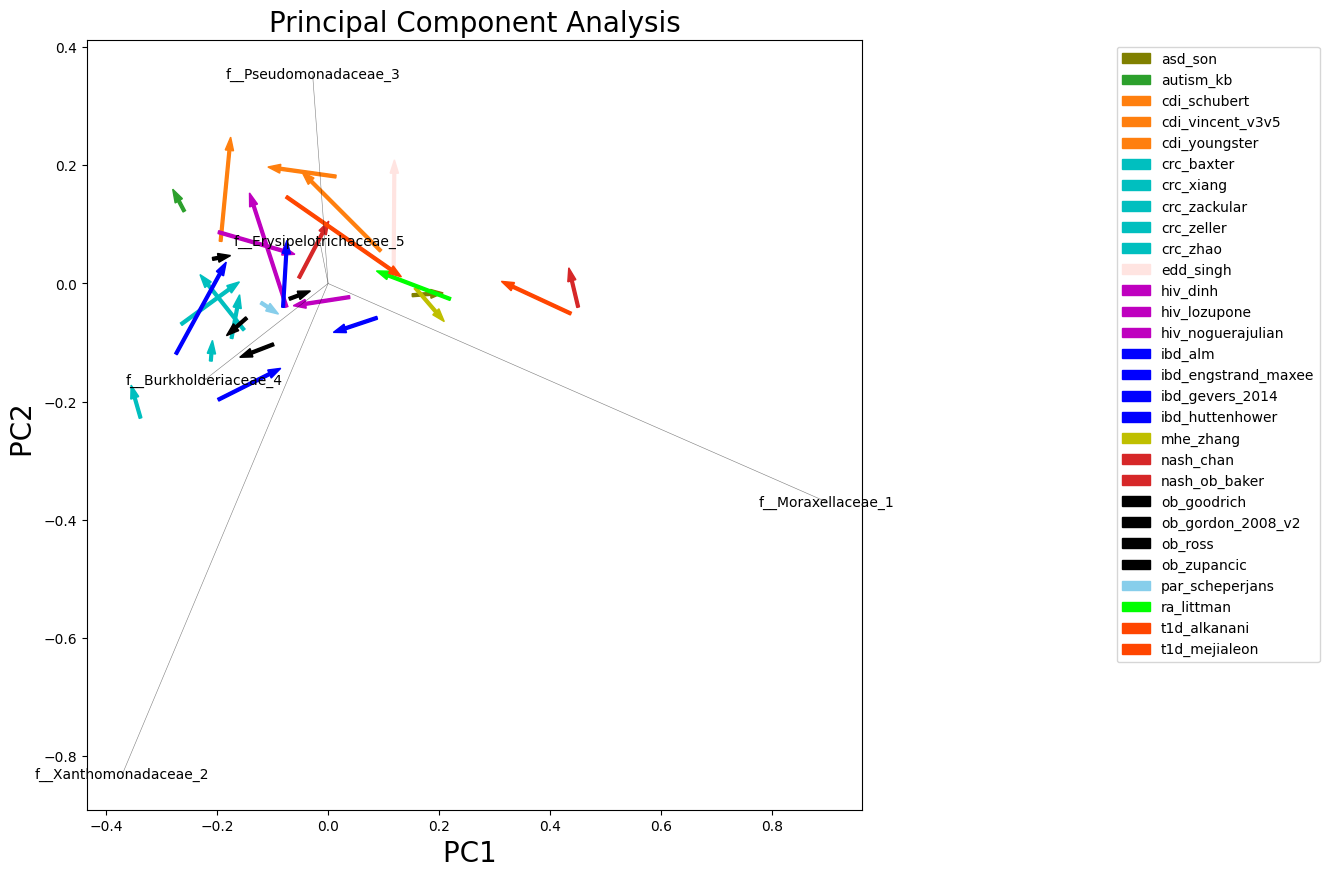

In [32]:
polar_data = plot_pca(components, loadings=loadings, tops=tops)

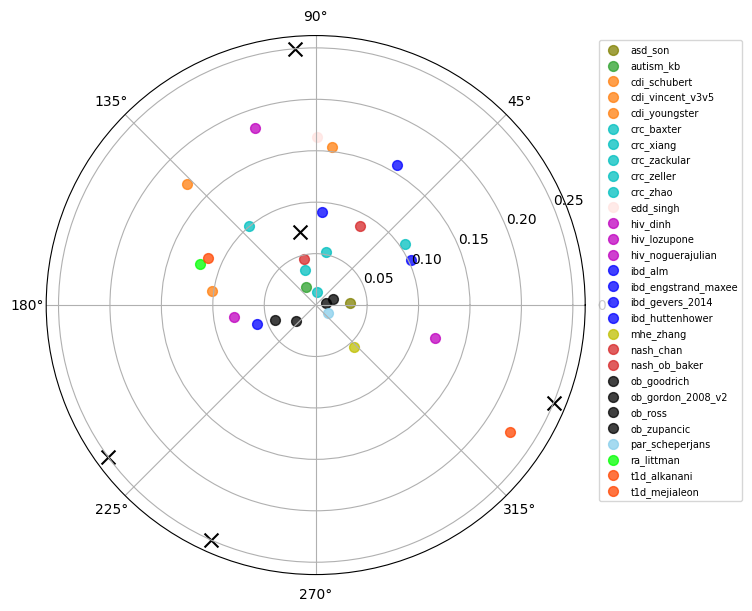

In [33]:
from matplotlib.patches import Ellipse
angles, sizes = polar_data

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='polar')
for angle,name,size in zip(angles,all_names,sizes):
    # ax.errorbar(angle, size, xerr=x,yerr=y, c=color_disease[name[1]], alpha=1, marker='o')
    # ax.errorbar(angle, size, xerr=x, yerr=y, c=color, alpha=0.75, marker='o')
    ax.scatter(angle, size, c=color_disease[data_map[name]], alpha=0.75, s=50)
    # c = ax.scatter(angle, size, c=color, alpha=0.75, s=50)
for (i, arrow), index in zip(enumerate(loadings[-5:]),tops):
    ax.scatter(math.atan2(arrow[1], arrow[0]),min(math.sqrt((arrow[0])**2+(arrow[1])**2),0.25),  c='black', alpha=1, marker='x', s=100)
    # ax.text(arrow[0], arrow[1], all_data.columns[index]+'_'+str(i), ha='center', va='center')
plt.legend(all_names,prop={'size': 7}, bbox_to_anchor=(1.3, 1))

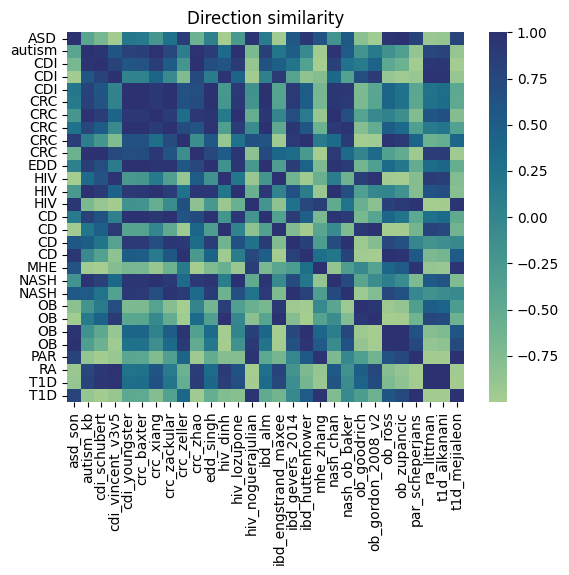

In [34]:
new_df = pd.DataFrame({'angles': angles, 'length': sizes, 'names': np.array(all_names),'disease': np.array([data_map[name] for name in all_names])})
new_df['similarity'] = [np.cos(new_df['angles'][i]- new_df['angles']) for i in range(len(new_df))]
mat = [np.array(np.cos(new_df['angles'][i]-new_df['angles'])) for i in range(len(new_df))]
n = len(mat)
plt.figure()
plt.title('Disease Similarity matrix',fontsize=20)
plt.title('Direction similarity')
plt.xticks(range(n), all_names, rotation=90)
plt.yticks(range(n), all_names)
plot = seaborn.heatmap(mat,xticklabels=all_names, yticklabels=[data_map[name] for name in all_names],cmap="crest")
plt.show()

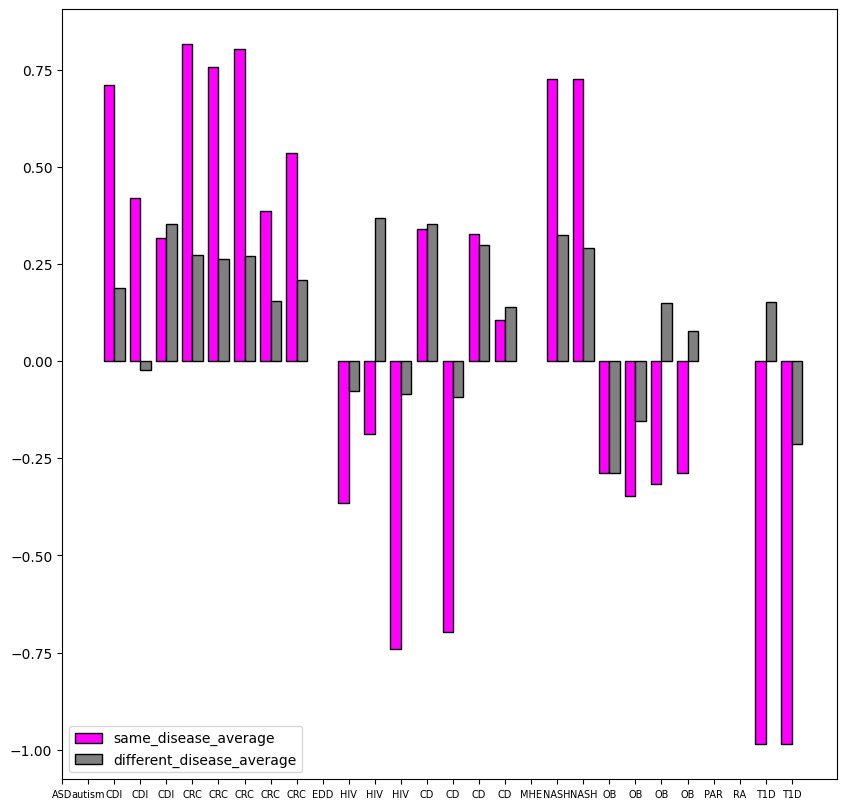

In [35]:
indexes = [i for i in range(29) if i not in [0,1,10, 18, 25, 26]]
new_df.loc[indexes,'different_disease'] = [sum((new_df['similarity'][i][(new_df['disease'][i] != new_df['disease']) & (new_df['names'][i] != new_df['names'])]))/len(new_df['similarity'][i][(new_df['disease'][i] != new_df['disease']) & (new_df['names'][i] != new_df['names'])]) for i in indexes]
new_df.loc[indexes,'same_disease'] = [sum((new_df['similarity'][i][(new_df['disease'][i] == new_df['disease']) & (new_df['names'][i] != new_df['names'])]))/len(new_df['similarity'][i][(new_df['disease'][i] == new_df['disease']) & (new_df['names'][i] != new_df['names'])]) for i in indexes]

n= 29
r = np.arange(n)
width = 0.4
  
plt.figure(figsize=(10,10))
plt.bar(r, new_df.loc[:,'same_disease'], color = 'magenta',
        width = width, edgecolor = 'black',
        label='same_disease_average')
plt.bar(r + width, new_df.loc[:, 'different_disease'], color = 'grey',
        width = width, edgecolor = 'black',
        label='different_disease_average')

# plt.grid(linestyle='--')
plt.xticks(r + width/2,new_df.loc[:,'disease'], size=7)
plt.legend()

PCoA

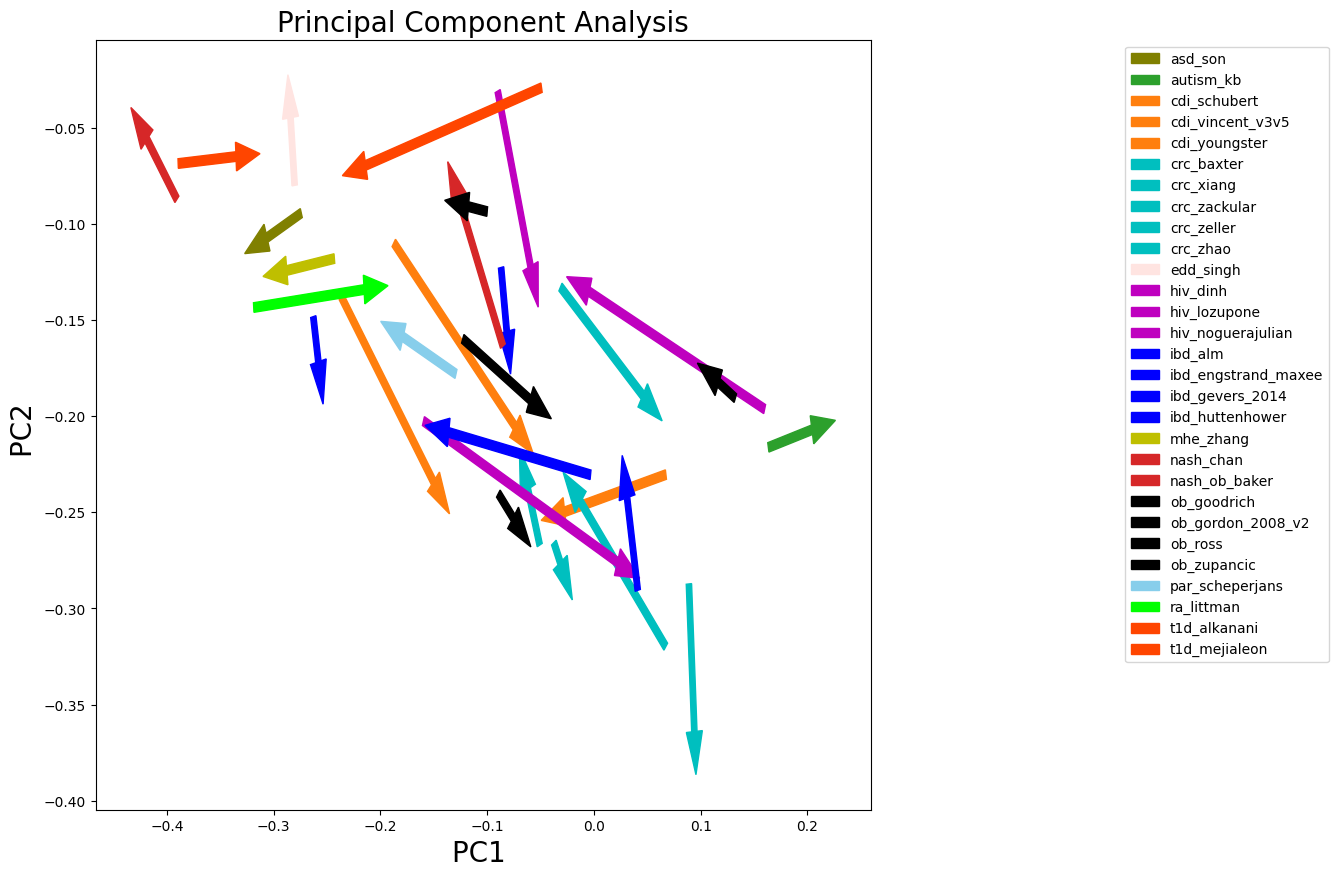

In [23]:
polar_data = plot_pca(components_pcoa, pca=False)

POLAR PLOT

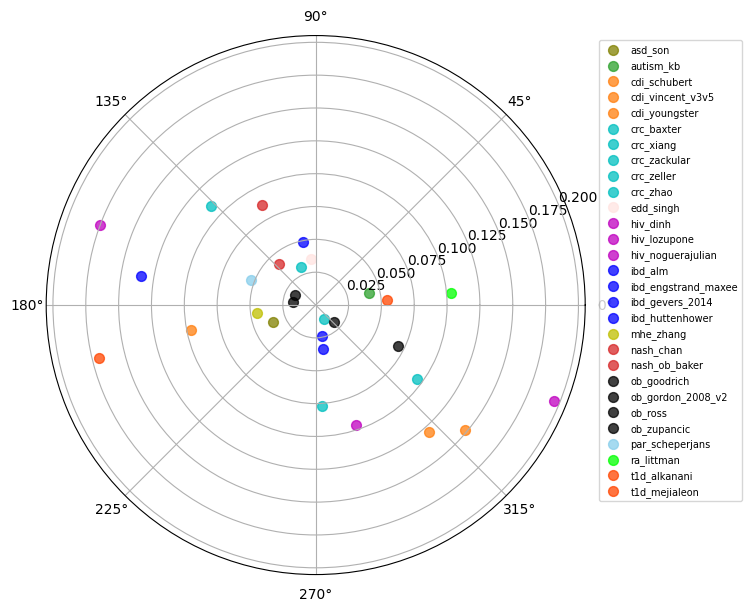

In [24]:
from matplotlib.patches import Ellipse
angles, sizes = polar_data

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='polar')
for angle,name,size in zip(angles,all_names,sizes):
    # ax.errorbar(angle, size, xerr=x,yerr=y, c=color_disease[name[1]], alpha=1, marker='o')
    # ax.errorbar(angle, size, xerr=x, yerr=y, c=color, alpha=0.75, marker='o')
    c = ax.scatter(angle, size, c=color_disease[data_map[name]], alpha=0.75, s=50)
    # c = ax.scatter(angle, size, c=color, alpha=0.75, s=50)
plt.legend(all_names,prop={'size': 7}, bbox_to_anchor=(1.3, 1))


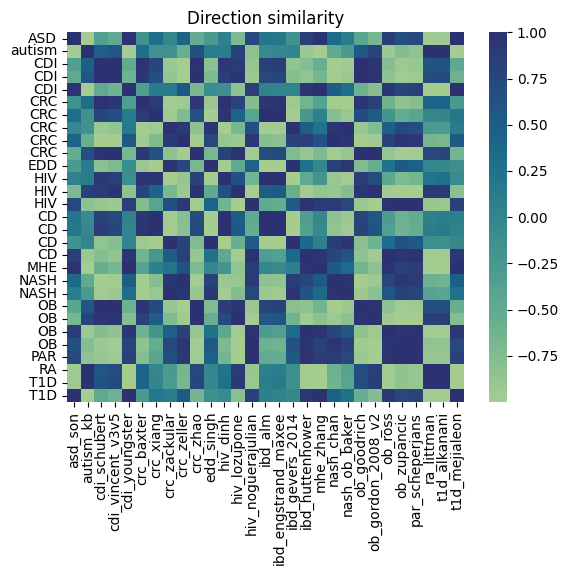

In [25]:
new_df = pd.DataFrame({'angles': angles, 'length': sizes, 'names': np.array(all_names),'disease': np.array([data_map[name] for name in all_names])})
new_df['similarity'] = [np.cos(new_df['angles'][i]- new_df['angles']) for i in range(len(new_df))]
mat = [np.array(np.cos(new_df['angles'][i]-new_df['angles'])) for i in range(len(new_df))]
n = len(mat)
plt.figure()
plt.title('Disease Similarity matrix',fontsize=20)
plt.title('Direction similarity')
plt.xticks(range(n), all_names, rotation=90)
plt.yticks(range(n), all_names)
plot = seaborn.heatmap(mat,xticklabels=all_names, yticklabels=[data_map[name] for name in all_names],cmap="crest")
plt.show()

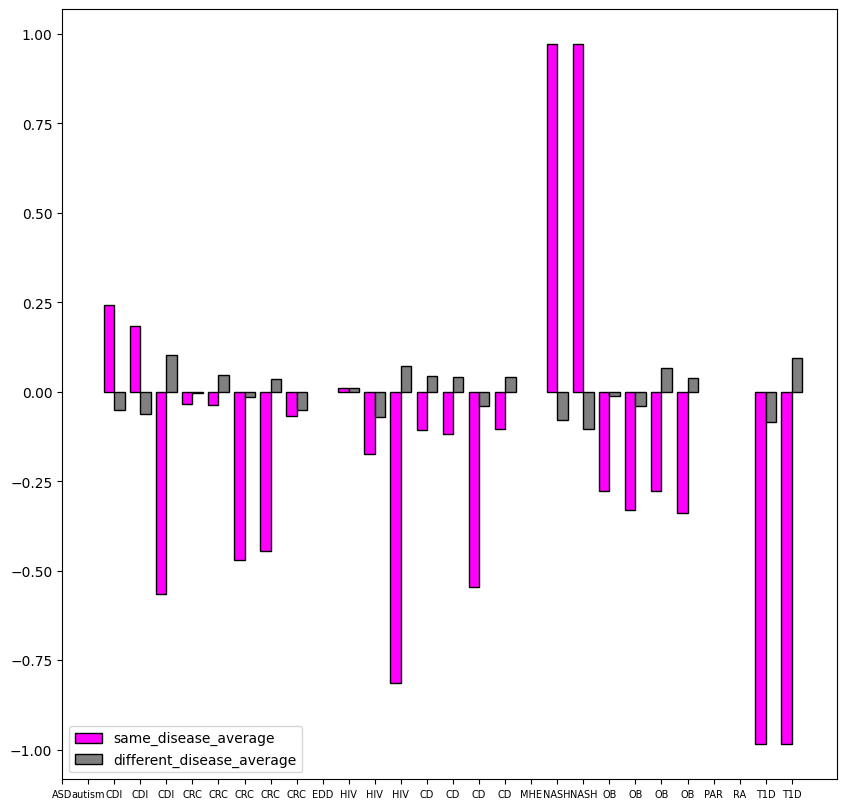

In [26]:
indexes = [i for i in range(29) if i not in [0,1,10, 18, 25, 26]]
new_df.loc[indexes,'different_disease'] = [sum((new_df['similarity'][i][(new_df['disease'][i] != new_df['disease']) & (new_df['names'][i] != new_df['names'])]))/len(new_df['similarity'][i][(new_df['disease'][i] != new_df['disease']) & (new_df['names'][i] != new_df['names'])]) for i in indexes]
new_df.loc[indexes,'same_disease'] = [sum((new_df['similarity'][i][(new_df['disease'][i] == new_df['disease']) & (new_df['names'][i] != new_df['names'])]))/len(new_df['similarity'][i][(new_df['disease'][i] == new_df['disease']) & (new_df['names'][i] != new_df['names'])]) for i in indexes]

n= 29
r = np.arange(n)
width = 0.4
  
plt.figure(figsize=(10,10))
plt.bar(r, new_df.loc[:,'same_disease'], color = 'magenta',
        width = width, edgecolor = 'black',
        label='same_disease_average')
plt.bar(r + width, new_df.loc[:, 'different_disease'], color = 'grey',
        width = width, edgecolor = 'black',
        label='different_disease_average')
  
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,new_df.loc[:,'disease'], size=7)
plt.legend()

Leave one out test

PCA- fit both data

PCA- fit only american

PCA- all data vs only american's

In [ ]:
def pca_disease(disease):
    arrows = []
    lst = disease_map[disease] + ['None']*(5-len(disease))
    data_partial = dataHD[(dataHD['From'] == lst[0]) | (dataHD['From'] == lst[1]) | (dataHD['From'] == lst[2]) | (dataHD['From'] == lst[3]) | (dataHD['From'] == lst[4])]
    keep_features = [i for i in data_partial.columns if i in dataAmericans.columns and data_partial[i].sum() > 0.1] 
    print(len(keep_features))  
    data_filtered = data_partial.loc[:,keep_features]
    dataAmericans_filtered = dataAmericans.loc[:,keep_features]     
    pca = PCA(n_components=2)
    pca.fit(pd.concat([dataAmericans_filtered, data_filtered]))
    components_americans = pca.transform(dataAmericans_filtered)
    components_disease = pca.transform(data_filtered)
    print("explained variance: ", sum(pca.explained_variance_ratio_))
    pca_americans = pd.DataFrame(data= components_americans, columns= ['Pc1', 'Pc2'])
    pca_disease = pd.DataFrame(data= components_disease, columns= ['Pc1', 'Pc2'])  
    
    plt.xlabel('Pc1 ', fontsize=10)
    plt.ylabel('Pc2 ', fontsize=10)
    plt.title("Principal Component Analysis",fontsize=20)
    targets = lst
    colors = ['r','c', 'b','lime']
    for target, color in zip(targets,colors):
        indicesToKeep = (data_partial['From'] == target) & (data_partial['State'] == 'H')
        x = pca_disease.loc[indicesToKeep.values, 'Pc1'].values.mean()
        y = pca_disease.loc[indicesToKeep.values, 'Pc2'].values.mean()
        arrows.append(x)
        arrows.append(y)  
        plt.scatter(pca_disease.loc[indicesToKeep.values, 'Pc1'] , pca_disease.loc[indicesToKeep.values, 'Pc2'], c=color, edgecolors=color, s=50)
        indicesToKeep = (data_partial['From'] == target) & (data_partial['State'] == 'D')
        x = pca_disease.loc[indicesToKeep.values, 'Pc1'].values.mean()
        y = pca_disease.loc[indicesToKeep.values, 'Pc2'].values.mean()
        arrows.append(x)
        arrows.append(y)  
        plt.scatter(pca_disease.loc[indicesToKeep.values, 'Pc1'] , pca_disease.loc[indicesToKeep.values, 'Pc2'], c='none', edgecolors=color, s=50)
    
    # find centroids and plotting an arrow
    col = ['r', 'c', 'b', 'lime']
    for j in range(0,len(arrows),4):
        plt.arrow(arrows[j], arrows[j+1], arrows[j+2]-arrows[j],arrows[j+3]-arrows[j+1], color=col[j//4], width = 0.01)
    plt.legend(targets) 
    # fig.show() 

                              

In [ ]:
pca_disease("OB")

In [ ]:
data_map

POLAR PLOT

In [ ]:
from matplotlib.patches import Ellipse
# 'skyblue','mistyrose', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'b', 'g']
color_disease = {"CD": 'b', "CDI": '#ff7f0e', "autism": '#2ca02c', "OB": 'k', 'CRC': 'c', 'HIV': 'm', "EDD":'peru', "T1D": 'orangered', "RA": 'lime', "EDD": 'mistyrose', "PAR": 'skyblue', "NASH": '#d62728', "MHE": y, "ASD":'olive'}
var_x, var_y, angles, sizes = polar_data[0]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='polar')
for angle,name,size in zip(angles,all_names,sizes):
    # ax.errorbar(angle, size, xerr=x,yerr=y, c=color_disease[name[1]], alpha=1, marker='o')
    # ax.errorbar(angle, size, xerr=x, yerr=y, c=color, alpha=0.75, marker='o')
    c = ax.scatter(angle, size, c=color_disease[data_map[name]], alpha=0.75, s=50)
    # c = ax.scatter(angle, size, c=color, alpha=0.75, s=50)
plt.legend(all_names,prop={'size': 7}, bbox_to_anchor=(1.3, 1))
plt.show()

Now only for the microbiomeHD PCA.

In [ ]:
pca = PCA(n_components=2)
components_HD = pca.fit_transform(dataHD.drop(columns=['DiseaseState', 'From', 'State']))
print("explained variance: ", sum(pca.explained_variance_ratio_))
pca_HD = pd.DataFrame(data= components_HD, columns= ['Pc1', 'Pc2'])

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(wspace=0)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, polar=True)
# plt.xlabel('Pc1 ', fontsize=20)
# plt.ylabel('Pc2 ', fontsize=20)
# plt.title("Principal Component Analysis",fontsize=20)
# targets = [["huttenhower", "H"],["huttenhower", "D"], ["gevers", "H"],["gevers", "D"], ["youngster", "H"],["youngster", "D"], ["schubert", "H"],["schubert", "D"],["vincent", "H"],["vincent", "D"],["asd", "H"],["asd", "D"],["autism", "H"],["autism", "D"],["ross", "H"],["ross", "D"],["littman", "H"],["littman", "D"],["alkanani", "H"],["alkanani", "D"],["xiang", "H"],["xiang", "D"],["zackular", "H"],["zackular", "D"],["zeller", "H"],["zeller", "D"],["zhao", "H"],["zhao", "D"],["singh", "H"],["singh", "D"],["dinh", "H"],["dinh", "D"],["lozupone", "H"],["lozupone", "D"]]

colors = ['r', 'r', 'g', 'g', 'b', 'b','m', 'm', 'c', 'c','y','y','k','k','lime','lime','indigo','indigo','gold','gold','olive','olive','grey','grey','royalblue','royalblue','peru','peru','orangered','orangered','skyblue','skyblue','mistyrose','mistyrose']
arrows, var_x, var_y, angles, sizes = [], [], [], [], []
# axes[i].scatter(pca_americans1.loc[:,'Pc1'], pca_americans1.loc[:,'Pc2'],marker='.',s=2, color= 'g')
for target, color in zip(targets,colors):
    indicesToKeep = (dataHD['From'] == target[0]) & (dataHD['State'] == target[1])
    fill = 'none'
    if target[1] == "D":
        fill = color
    x = pca_HD.loc[indicesToKeep.values, 'Pc1'].values.mean()
    y = pca_HD.loc[indicesToKeep.values, 'Pc2'].values.mean()
    x_v = np.var(pca_HD.loc[indicesToKeep.values, 'Pc1'].values)
    y_v = np.var(pca_HD.loc[indicesToKeep.values, 'Pc2'].values)
    var_x.append(x_v)
    var_y.append(y_v)
    arrows.append(x)
    arrows.append(y)
    # axes[0].scatter(pca_HD.loc[indicesToKeep.values, 'Pc1'] , pca_HD.loc[indicesToKeep.values, 'Pc2'], c=fill, edgecolors=color, s=50)
# find centroids and plotting an arrow
col = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose']
for j in range(0,len(arrows),4):
    ax1.arrow(arrows[j], arrows[j+1], arrows[j+2]-arrows[j],arrows[j+3]-arrows[j+1], color=col[j//4],width = 0.01)
    angles.append(math.atan2(arrows[j+3]-arrows[j+1],arrows[j+2]-arrows[j]))
    sizes.append(math.sqrt((arrows[j+2]-arrows[j])**2+(arrows[j+3]-arrows[j+1])**2))
L = ["huttenhower-CD", "gevers-CD", "youngster-CDI", "schubert-CDI","vincent-CDI","asd-ASD","autism","ross-OBESE","littman-RA","alkanani-T1D","xiang-CRC","zackular-CRC","zeller-CRC","zhao-CRC","singh-EDD","dinh-HIV","lozupone-HIV"]
plt.legend(L) 

colors = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose']
color_disease = {"CD": 'b', "CDI": 'g', "autism": 'r', "Obese": 'k', 'CRC': 'c', 'HIV': 'm', "EDD":'peru', "T1D": 'orangered', "RA": 'lime'}
L = [["huttenhower","CD"], ["gevers","CD"], ["youngster","CDI"], ["schubert","CDI"],["vincent","CDI"],["asd","autism"],["autism","autism"],["ross","Obese"],["littman","RA"],["alkanani","T1D"],["zackular","CRC"],["xiang","CRC"],["zeller","CRC"],["zhao","CRC"],["singh","EDD"],["dinh","HIV"],["lozupone","HIV"]]

for angle,name,size,x,y,color in zip(angles,L,sizes,var_x,var_y,colors):
    # ax2.errorbar(angle, size, xerr=x,yerr=y, c=color_disease[name[1]], alpha=1, marker='o')
    # ax2.errorbar(angle, size, xerr=x, yerr=y, c=color, alpha=0.75, marker='o')
    c = ax2.scatter(angle, size, c=color_disease[name[1]], alpha=0.75, s=50)
    # c = ax2.scatter(angle, size, c=color, alpha=0.75, s=50)
ax2.legend(L,prop={'size': 7}, bbox_to_anchor=(1.3, 1))
plt.show()

STATISTICS

In [68]:
new_df = pd.DataFrame({'angles': angles, 'length': sizes, 'names': np.array(all_names)})

In [70]:
new_df

,angles,length,names
0,-0.508811,0.038589,asd_son
1,-2.168652,0.047536,autism_kb
2,-2.817729,0.152989,cdi_schubert
3,-3.103501,0.091507,cdi_vincent_v3v5
4,-1.875164,0.081880,cdi_youngster
5,NaN,NaN,crc_baxter
6,-2.518170,0.023848,crc_xiang
7,-2.349800,0.011768,crc_zackular
8,-0.022883,0.058448,crc_zeller
9,3.099615,0.086459,crc_zhao


In [62]:
mat = [np.cos(new_df['angles'][i], new_df['angles']) for i in range(len(new_df))]

C:\Users\talno\AppData\Local\Temp\ipykernel_24856\1254964716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mat = [np.cos(new_df['angles'][i], new_df['angles']) for i in range(len(new_df))]


In [76]:
[np.array(np.cos(new_df['angles'][i]-new_df['angles'])) for i in range(len(new_df))]

[array([ 1.        , -0.08892747, -0.67289951, -0.85413957,  0.20302158,
                nan, -0.42463919, -0.26691754,  0.88424216, -0.89299792,
        -0.62374572, -0.36038916, -0.86107569,  0.86435497, -0.55477269,
        -0.65683331,  0.17303168,  0.99875706,  0.87554278, -0.31590495,
         0.80545431, -0.94838399, -0.98339526,  0.89353795,  0.87487165,
         0.88129118, -0.83983894, -0.82996922,  0.7808652 ]),
 array([-0.08892747,  1.        ,  0.7966424 ,  0.59393994,  0.95724068,
                nan,  0.9395378 ,  0.98363752, -0.54381179,  0.52768975,
         0.83399872,  0.96115487,  0.58303555, -0.57775471,  0.87804018,
         0.80945892, -0.99640139, -0.13846258, -0.55908626,  0.97312446,
         0.51868281,  0.40020524,  0.26820847,  0.36774877,  0.40463574,
        -0.54907236,  0.61536976,  0.62940627, -0.69166493]),
 array([-0.67289951,  0.7966424 ,  1.        ,  0.95944416,  0.58771528,
                nan,  0.95546696,  0.89250457, -0.94048308,  0.93382309,


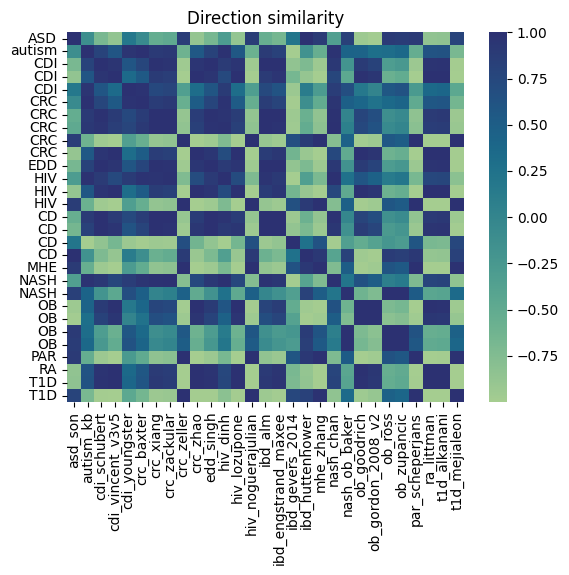

In [146]:
mat = [np.array(np.cos(new_df['angles'][i]-new_df['angles'])) for i in range(len(new_df))]
n = len(mat)
plt.figure()
plt.title('Disease Similarity matrix',fontsize=20)
plt.title('Direction similarity')
plt.xticks(range(n), all_names, rotation=90)
plt.yticks(range(n), all_names)
plot = seaborn.heatmap(mat,xticklabels=all_names, yticklabels=[data_map[name] for name in all_names],cmap="crest")
plt.show()

In [ ]:

new_df['similarity'] = mat
new_df['similarity'] = [np.delete(new_df['similarity'][i], i) for i in range(17)]
new_df['pred'] = [np.delete(np.array((new_df['disease'] == new_df['disease'][i]).values*1),i) for i in range(17)]
indexes = [i for i in range(17) if i not in [7,8,9,14]]
new_df.loc[indexes,'different_disease'] = [sum((new_df['similarity'][i][new_df['pred'][i] == 0]))/len(new_df['similarity'][i][new_df['pred'][i] == 0]) for i in indexes]
new_df.loc[indexes,'same_disease'] = [sum((new_df['similarity'][i][new_df['pred'][i] == 1]))/len(new_df['similarity'][i][new_df['pred'][i] == 1]) for i in indexes]

In [ ]:
new_df.head(3)

In [ ]:
indexes = [i for i in range(17) if i not in [7,8,9,14]]
new_df.loc[indexes,'different_disease'] = [sum((new_df['similarity'][i][new_df['pred'][i] == 0]))/len(new_df['similarity'][i][new_df['pred'][i] == 0]) for i in indexes]
new_df.loc[indexes,'same_disease'] = [sum((new_df['similarity'][i][new_df['pred'][i] == 1]))/len(new_df['similarity'][i][new_df['pred'][i] == 1]) for i in indexes]

n= len(indexes)
r = np.arange(n)
width = 0.4
  
  
plt.bar(r, new_df.loc[indexes,'same_disease'], color = 'magenta',
        width = width, edgecolor = 'black',
        label='same_D_av')
plt.bar(r + width, new_df.loc[indexes, 'different_disease'], color = 'grey',
        width = width, edgecolor = 'black',
        label='Diff_D_av')
  
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,new_df.loc[indexes,'disease'], size=7)
plt.legend()

In [ ]:
pca = PCA(n_components=2)
components_HD = pca.fit_transform(dataHD.query('DiseaseState != 0').drop(columns=['DiseaseState', 'From']))
print("explained variance: ", sum(pca.explained_variance_ratio_))
pca_HD = pd.DataFrame(data= components_HD, columns= ['Pc1', 'Pc2'])
pca_HD['Cluster'] = dataHD.query('DiseaseState != 0').DiseaseState

sns.lmplot( x="Pc1", y="Pc2",
data=pca_HD, 
fit_reg=False, 
hue='Cluster', # color by cluster
legend=True,
scatter_kws={"s": 80}) 


In [ ]:
from sklearn.manifold import TSNE
# tsne = TSNE(metric = 'braycurtis', perplexity=30.0)
tsne = TSNE(metric = 'jaccard', perplexity=30.0)
embeddings = tsne.fit_transform(dataHD.drop(columns=['DiseaseState', 'From']))
# embeddings = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=3).fit_transform(dataHD.drop(columns=['DiseaseState', 'From']))
pca_HD_e = pd.DataFrame(data = embeddings, columns = ['Pc1', 'Pc2'])

In [ ]:
import sklearn
sorted(sklearn.neighbors.VALID_METRICS['brute'])

In [ ]:

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(wspace=0)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, polar=True)

targets = [["huttenhower", "H"],["huttenhower", "D"], ["gevers", "H"],["gevers", "D"], ["youngster", "H"],["youngster", "D"], ["schubert", "H"],["schubert", "D"],["vincent", "H"],["vincent", "D"],["asd", "H"],["asd", "D"],["autism", "H"],["autism", "D"],["ross", "H"],["ross", "D"],["littman", "H"],["littman", "D"],["alkanani", "H"],["alkanani", "D"],["xiang", "H"],["xiang", "D"],["zackular", "H"],["zackular", "D"],["zeller", "H"],["zeller", "D"],["zhao", "H"],["zhao", "D"],["singh", "H"],["singh", "D"],["dinh", "H"],["dinh", "D"],["lozupone", "H"],["lozupone", "D"]]
colors = ['r', 'r', 'g', 'g', 'b', 'b','m', 'm', 'c', 'c','y','y','k','k','lime','lime','indigo','indigo','gold','gold','olive','olive','grey','grey','royalblue','royalblue','peru','peru','orangered','orangered','skyblue','skyblue','mistyrose','mistyrose']
arrows, var_x, var_y, angles, sizes = [], [], [], [], []
# axes[i].scatter(pca_americans1.loc[:,'Pc1'], pca_americans1.loc[:,'Pc2'],marker='.',s=2, color= 'g')
for target, color in zip(targets,colors):
    indicesToKeep = (dataHD['From'] == target[0]) & (dataHD['DiseaseState'] == target[1])
    fill = 'none'
    if target[1] == "D":
        # color = 'r'
        fill = color
    # else:
        # color = 'k'
    x = pca_HD_e.loc[indicesToKeep.values, 'Pc1'].values.mean()
    y = pca_HD_e.loc[indicesToKeep.values, 'Pc2'].values.mean()
    x_v = np.var(pca_HD_e.loc[indicesToKeep.values, 'Pc1'].values)
    y_v = np.var(pca_HD_e.loc[indicesToKeep.values, 'Pc2'].values)
    var_x.append(x_v)
    var_y.append(y_v)
    arrows.append(x)
    arrows.append(y)
    # if target[0] == 'schubert':
    ax1.scatter(pca_HD_e.loc[indicesToKeep.values, 'Pc1'] , pca_HD_e.loc[indicesToKeep.values, 'Pc2'], c=fill, edgecolors=color, s=50)

# find centroids and plotting an arrow
col = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose']
for j in range(0,len(arrows),4):
    ax1.arrow(arrows[j], arrows[j+1], arrows[j+2]-arrows[j],arrows[j+3]-arrows[j+1], color=col[j//4], width = 0.5)
    angles.append(math.atan2(arrows[j+3]-arrows[j+1],arrows[j+2]-arrows[j]))
    sizes.append(math.sqrt((arrows[j+2]-arrows[j])**2+(arrows[j+3]-arrows[j+1])**2))
L = ["huttenhower-CD", "gevers-CD", "youngster-CDI", "schubert-CDI","vincent-CDI","asd-ASD","autism","ross-OBESE","littman-RA","alkanani-T1D","xiang-CRC","zackular-CRC","zeller-CRC","zhao-CRC","singh-EDD","dinh-HIV","lozupone-HIV"]
plt.legend(L) 

colors = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose']
color_disease = {"CD": 'b', "CDI": 'g', "autism": 'r', "Obese": 'k', 'CRC': 'c', 'HIV': 'm', "EDD":'peru', "T1D": 'orangered', "RA": 'lime'}
L = [["huttenhower","CD"], ["gevers","CD"], ["youngster","CDI"], ["schubert","CDI"],["vincent","CDI"],["asd","autism"],["autism","autism"],["ross","Obese"],["littman","RA"],["alkanani","T1D"],["zackular","CRC"],["xiang","CRC"],["zeller","CRC"],["zhao","CRC"],["singh","EDD"],["dinh","HIV"],["lozupone","HIV"]]

for angle,name,size,x,y,color in zip(angles,L,sizes,var_x,var_y,colors):
    # ax2.errorbar(angle, size, xerr=x,yerr=y, c=color_disease[name[1]], alpha=1, marker='o')
    # ax2.errorbar(angle, size, xerr=x, yerr=y, c=color, alpha=0.75, marker='o')
    # size = 0.04
    c = ax2.scatter(angle, size, c=color_disease[name[1]], alpha=0.75, s=70)
    # c = ax2.scatter(angle, size, c=color, alpha=0.75, s=50)
ax1.legend(targets,prop={'size': 7}, bbox_to_anchor=(0.7, 1))
ax2.legend(L,prop={'size': 7}, bbox_to_anchor=(1.3, 1))
plt.show()

Bray-Curtis: Bray-Curtis is a widely used distance metric in microbiome analysis. It accounts for the relative abundance of taxa and is not affected by differences in overall sequencing depth. It is generally good for comparing community composition across different samples and habitats.

Jaccard: Jaccard is a binary distance metric that only considers the presence or absence of microbial taxa in a community. It is good for comparing the similarity of microbial communities based on their shared taxa.

